In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999
%matplotlib inline

In [4]:
# read listings.csv into a datframe
listings = pd.read_csv('listings.csv')
listings.head() # display the first 5 rows

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
listings.shape # display the shape of the dataframe

(3818, 92)

In [6]:
calendar = pd.read_csv('calendar.csv') # read calendar.csv into a dataframe
calendar.head() # display the first 5 rows of the datafrmae

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
calendar.shape # display the shape of the datafrmae

(1393570, 4)

In [8]:
reviews = pd.read_csv('reviews.csv') # read reviews.csv into a dataframe
reviews.head() # disaply the first 5 rows

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
reviews.shape # display the shape of the dataframe

(84849, 6)

In [10]:
calendar.dtypes # diaplay the dtypes of calendar 

listing_id     int64
date          object
available     object
price         object
dtype: object

In [11]:
calendar['date']=pd.to_datetime(calendar['date']) # change the date column into pandas datetime

In [12]:
calendar.dtypes # check to see if the change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [13]:
calendar['month'] = calendar['date'].dt.month # create a column called month

In [14]:
calendar.head(5) # check the first rows of the dataframe

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [15]:
calendar['date'].max() - calendar['date'].min() # check to see the length of time in the dataframe

Timedelta('364 days 00:00:00')

## Exploratory Data Analysis

### Part I: Which variables are highly correlating with price?

In [16]:
# a list of numeric columns we will be exploring
numeric_listings = listings[['accommodates','bathrooms', 'bedrooms', 
                             'beds', 'square_feet', 'guests_included',
                             'number_of_reviews', 'review_scores_rating', 
                             'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'review_scores_location',
                             'price'
                            ]].copy()

In [17]:
numeric_listings.info() # check non-cull counts and dtypes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3802 non-null   float64
 2   bedrooms                     3812 non-null   float64
 3   beds                         3817 non-null   float64
 4   square_feet                  97 non-null     float64
 5   guests_included              3818 non-null   int64  
 6   number_of_reviews            3818 non-null   int64  
 7   review_scores_rating         3171 non-null   float64
 8   review_scores_cleanliness    3165 non-null   float64
 9   review_scores_checkin        3160 non-null   float64
 10  review_scores_communication  3167 non-null   float64
 11  review_scores_location       3163 non-null   float64
 12  price                        3818 non-null   object 
dtypes: float64(9), int

Looks like the price column is an object. We will need to change it into a float type.

In [18]:
numeric_listings['price'] = numeric_listings['price'].str.replace('$', '').str.replace(',', '') # remove dollar sign and comma from price column

In [19]:
numeric_listings['price'] = numeric_listings['price'].astype('float64') # change the dtype from object to float

In [20]:
numeric_listings['price'].dtypes # check the new dtype

dtype('float64')

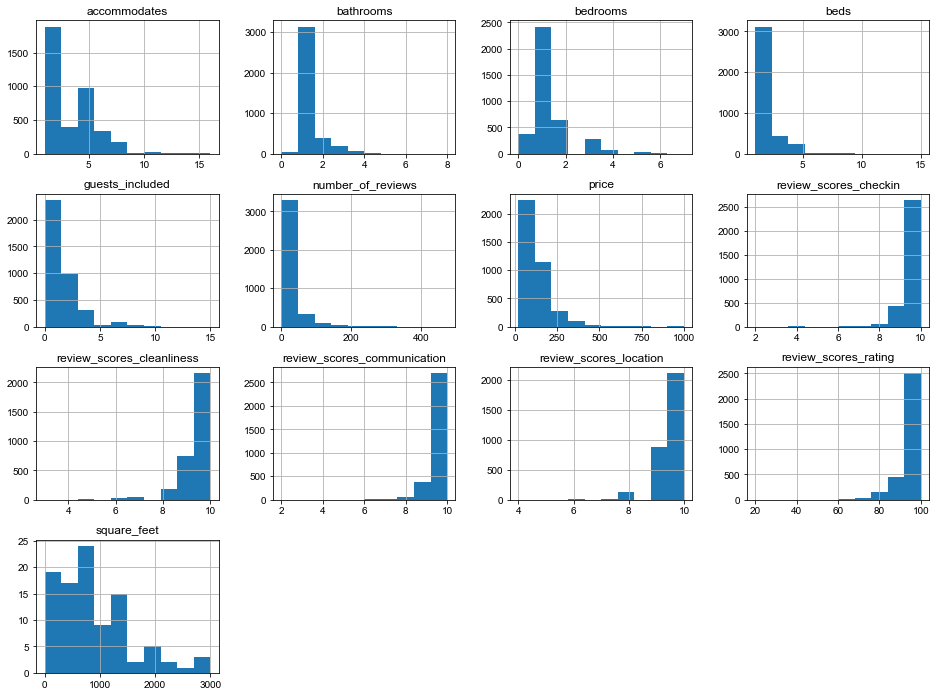

In [21]:
# display histograms of all columns in numeric_listings
numeric_listings.hist(figsize = (16, 12))
sns.set(style = 'darkgrid')
plt.show()

In [22]:
# create a correlation matrix
matrix = numeric_listings.corr()
matrix

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,price
accommodates,1.000000,0.538439,0.770974,0.861119,0.439057,0.532796,-0.072978,-0.013101,0.011646,-0.019664,-0.013208,-0.037520,0.652218
bathrooms,0.538439,1.000000,0.610937,0.532838,0.381094,0.304780,-0.092147,0.045101,0.018063,-0.002939,-0.016067,-0.008959,0.516424
bedrooms,0.770974,0.610937,1.000000,0.753167,0.448786,0.457009,-0.105555,0.023257,-0.008089,0.010509,0.001113,-0.028991,0.627720
beds,0.861119,0.532838,0.753167,1.000000,0.312155,0.460512,-0.089077,-0.000720,0.004732,-0.021963,-0.013373,-0.023734,0.589525
square_feet,0.439057,0.381094,0.448786,0.312155,1.000000,0.471582,-0.211970,0.143793,0.063302,0.052781,-0.021799,0.139595,0.531752
guests_included,0.532796,0.304780,0.457009,0.460512,0.471582,1.000000,0.028114,-0.001430,0.017999,0.035315,0.011658,-0.026576,0.392875
number_of_reviews,-0.072978,-0.092147,-0.105555,-0.089077,-0.211970,0.028114,1.000000,0.036242,0.055609,0.089449,0.072957,-0.009188,-0.124695
review_scores_rating,-0.013101,0.045101,0.023257,-0.000720,0.143793,-0.001430,0.036242,1.000000,0.642882,0.521813,0.540620,0.368423,0.055551
review_scores_cleanliness,0.011646,0.018063,-0.008089,0.004732,0.063302,0.017999,0.055609,0.642882,1.000000,0.398696,0.388146,0.277834,0.054357
review_scores_checkin,-0.019664,-0.002939,0.010509,-0.021963,0.052781,0.035315,0.089449,0.521813,0.398696,1.000000,0.696345,0.240903,0.007877


In [100]:
# create a maxtrix to show correlations with price 
price_matrix = matrix['price'].sort_values(ascending = False)
price_matrix

price                          1.00
accommodates                   0.65
bedrooms                       0.63
beds                           0.59
square_feet                    0.53
bathrooms                      0.52
guests_included                0.39
review_scores_location         0.08
review_scores_rating           0.06
review_scores_cleanliness      0.05
review_scores_communication    0.01
review_scores_checkin          0.01
number_of_reviews             -0.12
Name: price, dtype: float64

In [24]:
pd.options.display.float_format = '{:.2f}'.format # display the number with two digits after the decimal point

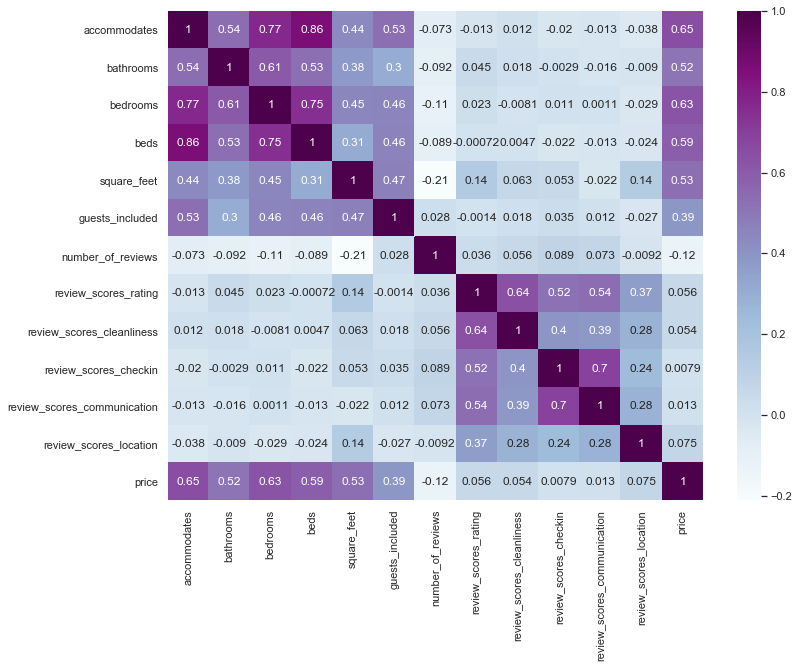

In [25]:
# create a correlation heatmap 
plt.figure(figsize = (12, 9))
sns.heatmap(matrix, annot = True, cmap = 'BuPu')

Among all the numeric variables we have explored, these are the ones that have the highest correlation scores.

guests_included:                0.39   
bathrooms:                       0.52   
square_feet:                    0.53   
beds:                            0.59   
bedrooms:                       0.63   
accommodates:                   0.65

### How about the neighborhoods? 

In [26]:
listings['price'] = numeric_listings['price'] # price column in the listings is now cleaned with proper dtype

In [101]:
# create a pivot table indexed by neighborhoods with median price
neighborhood_pivot = pd.DataFrame(listings
                                  .pivot_table(index = 'neighbourhood_cleansed',
                                               values = 'price', 
                                               aggfunc = np.median)
                                  .sort_values(by = 'price', ascending = False)
                                 )
neighborhood_pivot

,price
neighbourhood_cleansed,
Briarcliff,173.50
Pioneer Square,150.00
Westlake,150.00
Industrial District,150.00
Southeast Magnolia,150.00
...,...
Victory Heights,65.00
Bitter Lake,65.00
South Beacon Hill,60.00


In [28]:
# show top 20 neighborhoods with most listings
top_20_neighborhoods = listings['neighbourhood_cleansed'].value_counts(ascending = False).head(20)
top_20_neighborhoods

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Ravenna                       67
Mann                          67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Name: neighbourhood_cleansed, dtype: int64

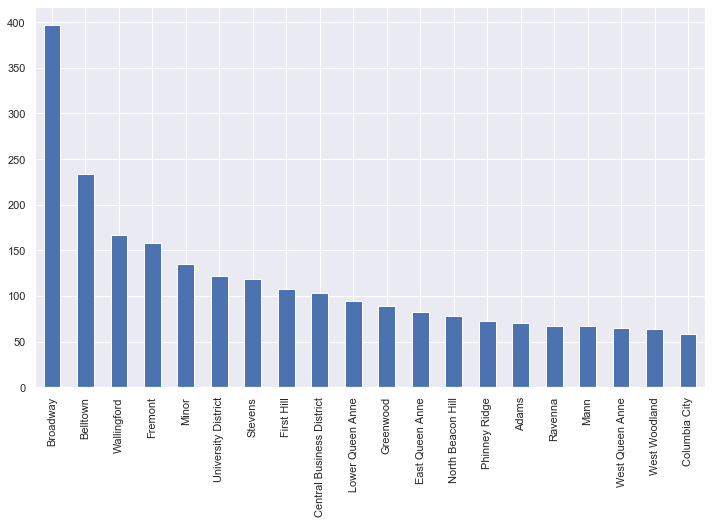

In [29]:
top_20_neighborhoods.plot.bar(figsize = (12, 7))
plt.show()

In [102]:
most_expensive_neighborhoods = neighborhood_pivot.loc[top_20_neighborhoods.index].\
                               sort_values(by = 'price', ascending = False)
most_expensive_neighborhoods

,price
Central Business District,149.00
Belltown,139.00
West Queen Anne,130.00
First Hill,127.00
East Queen Anne,125.00
Stevens,120.00
Lower Queen Anne,119.00
Fremont,106.00
Broadway,100.00
Wallingford,100.00


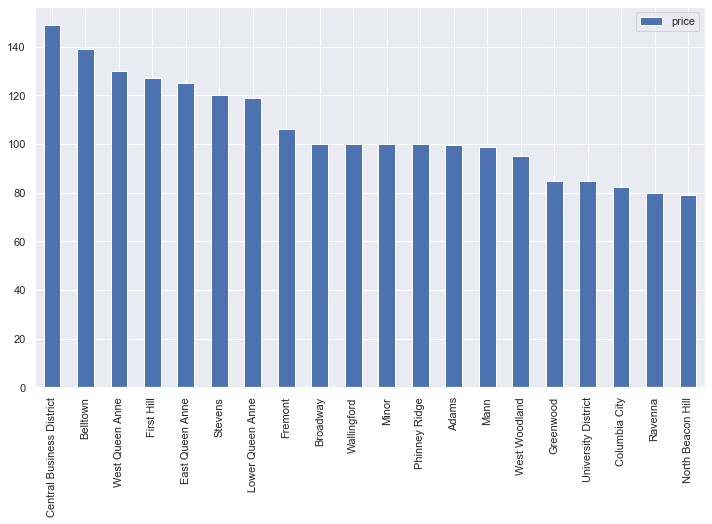

In [103]:
most_expensive_neighborhoods.plot.bar(figsize = (12, 7))
plt.show()

### Part II: What time of the year have the highest rate? 

In [32]:
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [33]:
calendar.shape

(1393570, 5)

In [34]:
calendar.isnull().sum()/len(calendar)

listing_id   0.00
date         0.00
available    0.00
price        0.33
month        0.00
dtype: float64

In [44]:
calendar.dropna(subset = ['price'], axis = 0, inplace = True)
calendar.shape

(934542, 5)

In [49]:
calendar['price'] = calendar['price'].str.replace('$', '')
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.00,1
1,241032,2016-01-05,t,85.00,1
9,241032,2016-01-13,t,85.00,1
10,241032,2016-01-14,t,85.00,1
14,241032,2016-01-18,t,85.00,1


In [51]:
calendar['price'] = calendar['price'].str.replace(',', '')

In [52]:
calendar['price'] = calendar['price'].astype('float64')

In [107]:
calendar_pivot = calendar.pivot_table(index = 'month', values = 'price', aggfunc = np.mean)
calendar_pivot

,price
month,
1,122.91
2,124.29
3,128.64
4,135.10
5,139.54
6,147.47
7,152.09
8,150.66
9,143.26


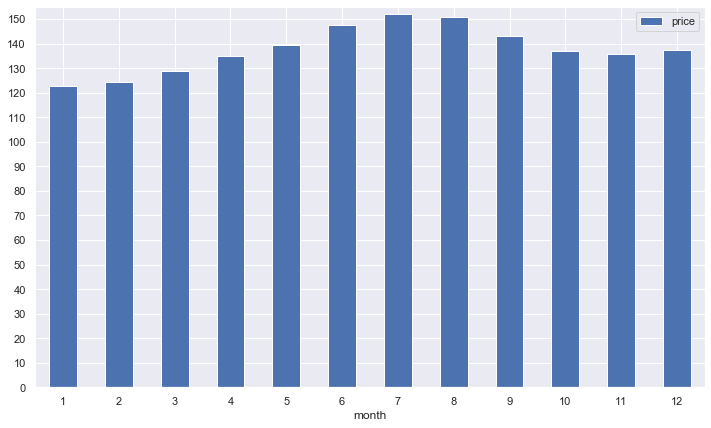

In [108]:
calendar_pivot.plot.bar(figsize = (12, 7))
plt.ylim((0, 155))
plt.yticks(np.arange(0, 160, 10))
plt.xticks(rotation = 0)
plt.show()

In [109]:
month_price_difference = (calendar_pivot['price'].max() - calendar_pivot['price'].min())/\
                          calendar_pivot['price'].min() * 100
round(month_price_difference, 2)

23.74

### Part III: What do people care most about a listing?

In [94]:
import collections
import nltk

list = ['great','stay', 'place', 'us', 'would', 
         'apartment','seattle', 'nice', 'everything', 'house', 
         'room','really', 'easy', 'definitely', 'recommend', 'time',
         ',', 'seattle.','also', 'made', 'perfect', 'home', 'close', 
         'get', 'well', 'staying',  'even', 'good','wonderful', 
         '-', 'like','enjoyed', 'one', 'stay.', 'little', 'highly',
         'overall', 'thanks', '(websitehidden)', 'experience', 'thank',
         'host', 'needed'
       ]
       
top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
for word in list:
    stopwords.append(word)
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}


In [90]:
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
reviews['comments'] = (reviews['comments']
                       .str.replace('.','')
                       .str.replace(',','')
                       .str.replace(":","")
                       .str.replace("\"","")
                       .str.replace("!","")
                       .str.replace('-','')
                       .str.replace('--','')
                       .str.replace("'", '')
)


              Frequency
Word                   
clean             29021
location          28420
comfortable       24929
neighborhood      18029
downtown          15526
space             13871
quiet             12039
area              11421
bed               11270
restaurants       11194


Text(0.5, 0, 'Frequent Words')

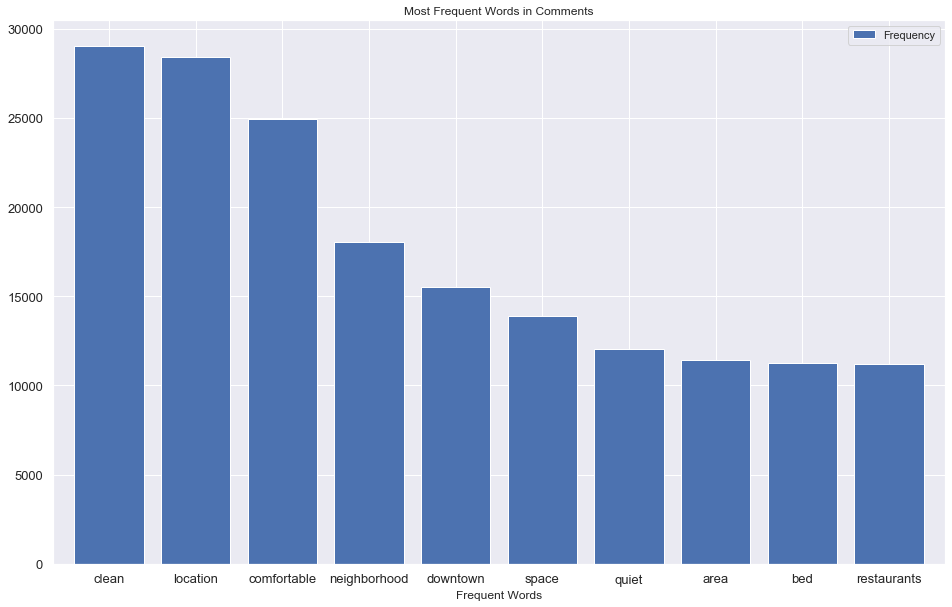

In [99]:
words = (reviews['comments']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
         )

rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8, fontsize = 13)
plt.title('Most Frequent Words in Comments')
plt.xlabel('Frequent Words')